In [1]:
import sys
sys.path.append("../")

In [2]:
from Classes.cognitive_model_agents import QAttendance

In [4]:
DASH_LINE = '-'*60
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
	"learning_rate": 0.1,
	"discount_factor": 0,
	"go_drive":0,
	"strength":0.5,
	"inverse_temperature":32
}
agent = QAttendance(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True

In [5]:
print('')
print(DASH_LINE)
print('Test bar is full')
print(DASH_LINE)    
action = 1
state = [action, 1]
print('Initial state:', state)
agent.decisions.append(action)
agent.prev_state_ = tuple(state)
for i in range(100):
	print(f'---------- Round {i} ----------')
	preferences = agent.determine_action_preferences(state)
	print(f'Action preferences in state {state}: {preferences}')
	probabilities = agent.softmax(preferences)
	print('Action probabilities:', probabilities)
	action = agent.make_decision()
	print('Chosen action:', action)
	agent.decisions.append(action)
	new_state = [action, 1]
	state = new_state
	print('State arrived:', new_state)
	payoff = agent.payoff(action, state)
	print(f'Payoff action {action}: {payoff}')
	agent.update(payoff, state)
	agent.prev_state_ = tuple(state)  


------------------------------------------------------------
Test bar is full
------------------------------------------------------------
Initial state: [1, 1]
---------- Round 0 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities: [0.5 0.5]
Probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 1]
Payoff action 1: -1
Average go frequency: 1.0
Reward with average go frequency: 0.0
Learning rule:
Q[(1, 1),1] <- 0.0 + 0.1 * (0.0 - 0.0)
Q[(1, 1),1] = 0.0
---------- Round 1 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities: [0.5 0.5]
Probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 1]
Payoff action 1: -1
Average go frequency: 1.0
Reward with average go frequency: 0.0
Learning rule:
Q[(1, 1),1] <- 0.0 + 0.1 * (0.0 - 0.0)
Q[(1, 1),1] = 0.0
---------- Round 2 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities: [0.5 0.5]
Probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
St

In [6]:
print('')
print(DASH_LINE)
print('Test bar has capacity')
print(DASH_LINE) 
agent = QAttendance(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
action = 1
state = [action, 0]
print('Initial state:', state)
agent.decisions.append(action)
agent.prev_state_ = tuple(state)
for i in range(10):
	print(f'---------- Round {i} ----------')
	preferences = agent.determine_action_preferences(state)
	print(f'Action preferences in state {state}: {preferences}')
	probabilities = agent.softmax(preferences)
	print('Action probabilities:', probabilities)
	action = agent.make_decision()
	print('Chosen action:', action)
	agent.decisions.append(action)
	new_state = [action, 0]
	state = new_state
	print('State arrived:', new_state)
	payoff = agent.payoff(action, state)
	print(f'Payoff action {action}: {payoff}')
	agent.update(payoff, state)
	agent.prev_state_ = tuple(state)


------------------------------------------------------------
Test bar has capacity
------------------------------------------------------------
Initial state: [1, 0]
---------- Round 0 ----------
Action preferences in state [1, 0]: [0. 0.]
Action probabilities: [0.5 0.5]
Probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 0]
Payoff action 0: 0
Average go frequency: 0.5
Reward with average go frequency: 0.25
Learning rule:
Q[(1, 0),0] <- 0.0 + 0.1 * (0.25 - 0.0)
Q[(1, 0),0] = 0.025
---------- Round 1 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities: [0.5 0.5]
Probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Average go frequency: 0.5
Reward with average go frequency: 0.75
Learning rule:
Q[(0, 0),1] <- 0.0 + 0.1 * (0.75 - 0.0)
Q[(0, 0),1] = 0.07500000000000001
---------- Round 2 ----------
Action preferences in state [1, 0]: [0.025 0.   ]
Action probabilities: [0.68997448 0.31002552]
Probabiliti

100%|██████████| 10/10 [00:02<00:00,  3.63it/s]


Plotting render...
Plotting efficiency...
Plot saved to ../../images/QAttendance/efficiency_1.pdf
Plotting inequality...
Plot saved to ../../images/QAttendance/inequality_1.pdf
Plotting entropy...
Plot saved to ../../images/QAttendance/entropy_1.pdf
Plotting conditional_entropy...
Plot saved to ../../images/QAttendance/conditional_entropy_1.pdf


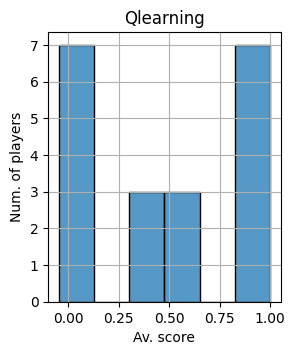

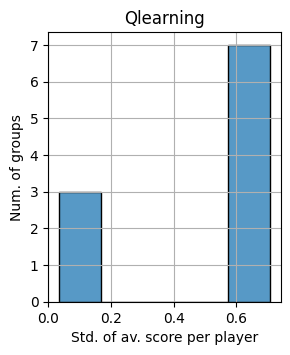

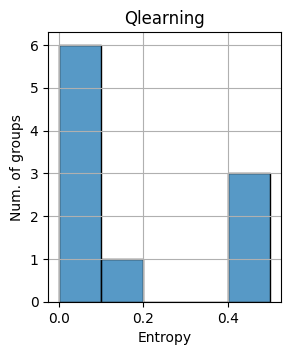

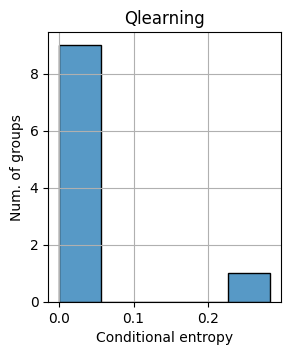

In [ ]:
from pathlib import Path
from Utils.interaction import Performer

image_folder = Path('../../images/QAttendance')
image_folder.mkdir(parents=True, exist_ok=True)

simulation_parameters = {
	'num_episodes':10,
	'num_rounds':1000,
	'verbose':False
}

LaTeX_string = Performer.simple_plots(
	agent_class=QAttendance,
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	simulation_parameters=simulation_parameters,
	measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy'],
	image_folder=image_folder
)